#### Variación de la concentración y contenido en un tanque usando modelo discreto

Paqueteria

In [7]:
using PyPlot

Datos del problema

In [8]:
# Corrientes de entrada
m1 = 7 # kg/min
m2 = 10 # kg/min
x1 = 0.1
x2 = 0.2

# Salida
m3 = 15 # kg/min

# Condiciones iniciales 
x0 = 0.3
M0 = 20 # kg

# Limite de llenado del tanque
Mf = 45 # kg 

45

Tiempo de modelado

In [9]:
# tiempo = (Mf - M0)/2
tiempo = collect(1:13)

13-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13

Modelos discretizados del balance general y el balance de la especie

In [10]:
Mt(M) = m1 + m2 - m3 + M
xt(M, x) = (m1*x1 + m2*x2 + M*x)/(m3 + Mt(M))

xt (generic function with 1 method)

Función para solución

In [11]:
function Tanque(M0, x0)
    Mt_list = [M0] 
    xt_list = [x0]
    for i in tiempo
        M_cal = Mt(Mt_list[i])
        append!(Mt_list, M_cal)
        x_cal = xt(Mt_list[i], xt_list[i])
        append!(xt_list, x_cal)
    end
    return Mt_list, xt_list
end

Tanque (generic function with 1 method)

Vectores con valores de llenado y concentración

In [12]:
Mt_list, xt_list = Tanque(M0, x0)

([20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46], [0.3, 0.23513513513513512, 0.20187110187110188, 0.1840221084123523, 0.17405987950514326, 0.16830392502542246, 0.16487484576090797, 0.16277540947651134, 0.1614581161215958, 0.1606130600071217, 0.16005993236855684, 0.1596911806095136, 0.15944117941694186, 0.15926904744828593])

Gráfico

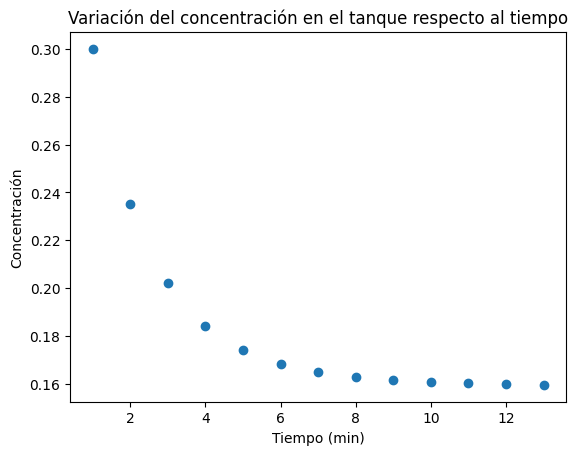

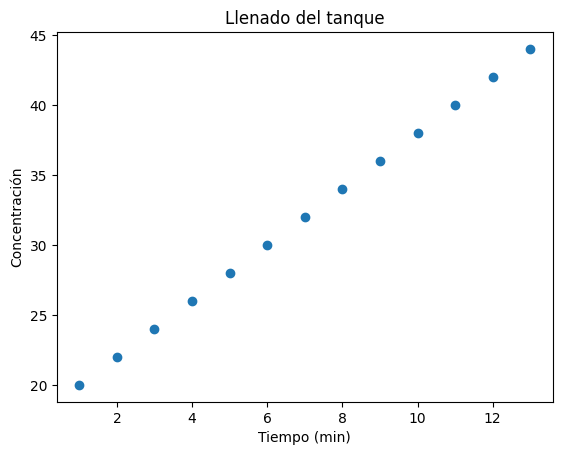

PyObject Text(24.000000000000007, 0.5, 'Concentración')

In [13]:
figure(1)
title("Variación del concentración en el tanque respecto al tiempo")
scatter(tiempo, xt_list[1:13]) 
xlabel("Tiempo (min)")
ylabel("Concentración")

figure(2)
title("Llenado del tanque")
scatter(tiempo, Mt_list[1:13]) 
xlabel("Tiempo (min)")
ylabel("Concentración")